


```
# This is formatted as code

# Project : Lead Conversion Prediction with Text Features


How does this project work ?

This model takes 2 types of features as input:
-> Structured Input
-> Unstructured Input

In structured Input there are 13 columns

INDEPENDENT FEATURES
ID
City_Code
Region_Code
Accomodation_Type
Reco_Insurance_Type
Upper_Age
Lower_Age
Is_Spouse
Health Indicator
Holding_Policy_Duration
Holding_Policy_Type
Reco_Policy_Cat
Reco_Policy_Premium

+

Interaction text(Synthetic dataset)(Unstructured dataset manually created)

=

DEPENDENT FEATURES
Response  


For the unstructured input i have created sample input text for 50,000 rows

we will give unstructured data along with the structured data as input to the model the job to the model is to classify if the lead will convert to the insurance customer or not

The response is the target variable 0-> No the lead will not convert and 1 means the lead will convert


```






In [61]:
# step : 1 Importing necessray libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#Step 2: Loading the training and test data


dataset=pd.read_csv('/content/train_with_text.csv')


In [63]:
#Step3: Viewing the dataset


dataset.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Interaction_Text
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,Interested in a standard health plan. Tell me ...
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,I need a plan for senior health. We need joint...
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,Interested in a standard health plan. Tell me ...
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,Interested in a standard health plan. We need ...
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,Interested in a standard health plan. Tell me ...
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1,Interested in a standard health plan. Tell me ...
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0,Looking for affordable insurance for young adu...
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1,I need a plan for senior health. I want covera...
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0,Interested in a standard health plan. We need ...
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1,Interested in a standard health plan. I want c...


In [64]:
#Step 4: Getting to know all the structured columns


dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
 14  Interaction_Text      

The above dataset contains missing values primarily in 3 columns


*   Health Indicator
*   Health_Policy_Duration


*   Health_Policy_Type






In [65]:
dataset.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


The above code provides us information about the numerical columns that are present in the dataset

In [66]:
#Step 5: Finding Null values in our dataset


dataset.isnull().sum()

,0
ID,0
City_Code,0
Region_Code,0
Accomodation_Type,0
Reco_Insurance_Type,0
Upper_Age,0
Lower_Age,0
Is_Spouse,0
Health Indicator,11691
Holding_Policy_Duration,20251


In [67]:
#Step 6:Interpolate the missing values / Filling in the missing values


dataset.interpolate(method ='linear', limit_direction ='forward')
dataset.fillna(axis=0, method='ffill', inplace=True)

/tmp/ipython-input-2626677502.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataset.interpolate(method ='linear', limit_direction ='forward')
/tmp/ipython-input-2626677502.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(axis=0, method='ffill', inplace=True)


In [68]:
# converting 'Holding_Policy_Type' from float to int


'''
While Exploring the data set this particular column -> Holding_Policy_Type contains mostly mixed value ie int and float

'''

dataset['Holding_Policy_Type'] = dataset['Holding_Policy_Type'].astype(int)


In [69]:
mean = dataset['Holding_Policy_Type'].mean()
dataset['Holding_Policy_Type'].fillna(mean)

,Holding_Policy_Type
0,3
1,3
2,1
3,3
4,1
...,...
50877,1
50878,3
50879,1
50880,2


In [70]:
dataset[0:20]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Interaction_Text
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3,22,11628.0,0,Interested in a standard health plan. Tell me ...
1,2,C5,1117,Owned,Joint,75,22,No,X2,14+,3,22,30510.0,0,I need a plan for senior health. We need joint...
2,3,C5,3732,Owned,Individual,32,32,No,X2,1.0,1,19,7450.0,1,Interested in a standard health plan. Tell me ...
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3,19,17780.0,0,Interested in a standard health plan. We need ...
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1,16,10404.0,0,Interested in a standard health plan. Tell me ...
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1,22,15264.0,1,Interested in a standard health plan. Tell me ...
6,7,C3,679,Owned,Individual,28,28,No,X2,5.0,1,17,10640.0,0,Looking for affordable insurance for young adu...
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4,17,29344.0,1,I need a plan for senior health. I want covera...
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3,1,27283.2,0,Interested in a standard health plan. We need ...
9,10,C1,530,Owned,Joint,59,26,Yes,X1,7.0,4,18,21100.8,1,Interested in a standard health plan. I want c...


In [71]:
dataset.isna().sum()

,0
ID,0
City_Code,0
Region_Code,0
Accomodation_Type,0
Reco_Insurance_Type,0
Upper_Age,0
Lower_Age,0
Is_Spouse,0
Health Indicator,0
Holding_Policy_Duration,0


In [72]:
dataset[0:10]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Interaction_Text
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3,22,11628.0,0,Interested in a standard health plan. Tell me ...
1,2,C5,1117,Owned,Joint,75,22,No,X2,14+,3,22,30510.0,0,I need a plan for senior health. We need joint...
2,3,C5,3732,Owned,Individual,32,32,No,X2,1.0,1,19,7450.0,1,Interested in a standard health plan. Tell me ...
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3,19,17780.0,0,Interested in a standard health plan. We need ...
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1,16,10404.0,0,Interested in a standard health plan. Tell me ...
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1,22,15264.0,1,Interested in a standard health plan. Tell me ...
6,7,C3,679,Owned,Individual,28,28,No,X2,5.0,1,17,10640.0,0,Looking for affordable insurance for young adu...
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4,17,29344.0,1,I need a plan for senior health. I want covera...
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3,1,27283.2,0,Interested in a standard health plan. We need ...
9,10,C1,530,Owned,Joint,59,26,Yes,X1,7.0,4,18,21100.8,1,Interested in a standard health plan. I want c...


In [73]:
dataset.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response',
       'Interaction_Text'],
      dtype='object')

Visualizing some independent features with Response

Text(0.5, 1.0, 'City_Code vs Response')

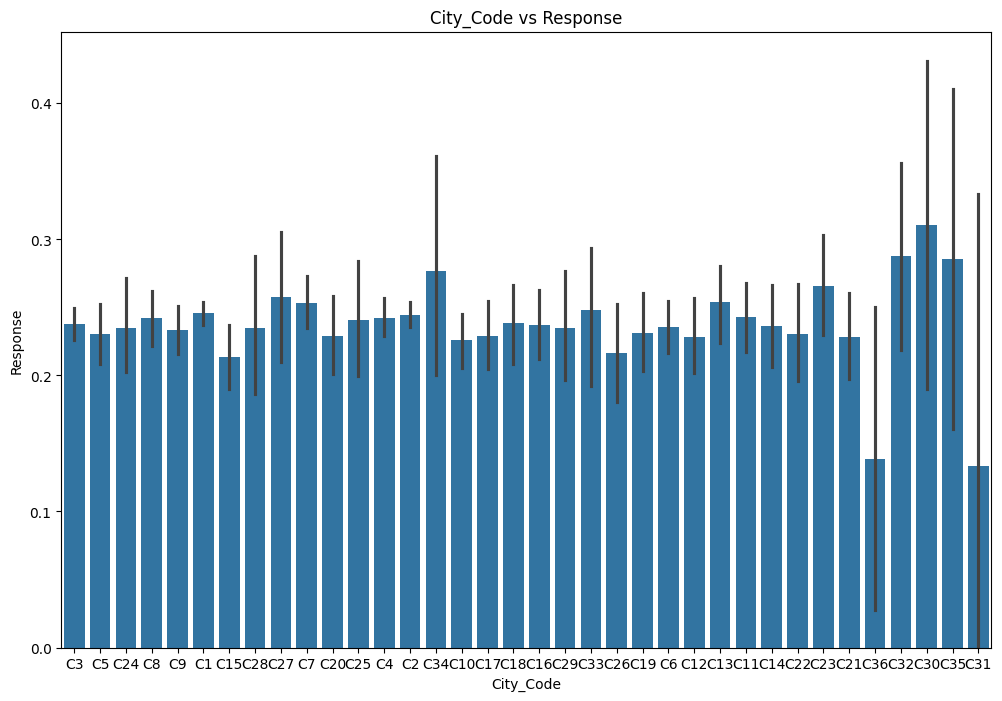

In [74]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'City_Code', y = 'Response', data = dataset)

plt.title("City_Code vs Response")

Text(0.5, 1.0, 'Accomodation_Type vs Response')

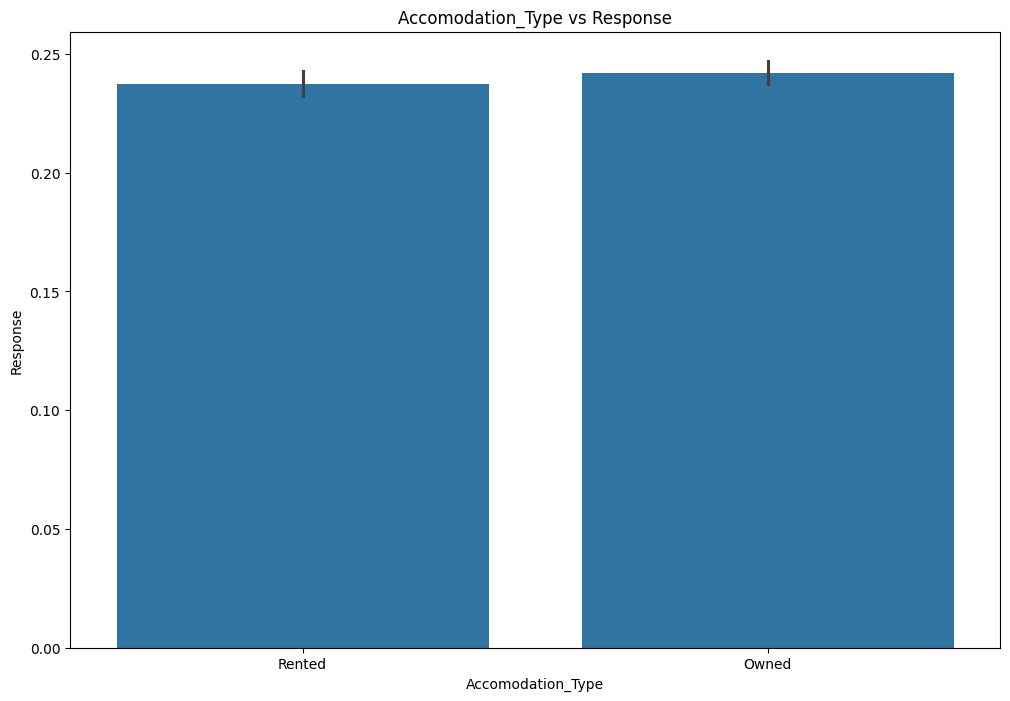

In [75]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Accomodation_Type', y = 'Response', data = dataset)

plt.title("Accomodation_Type vs Response")

Text(0.5, 1.0, 'Reco_Insurance_Type vs Response')

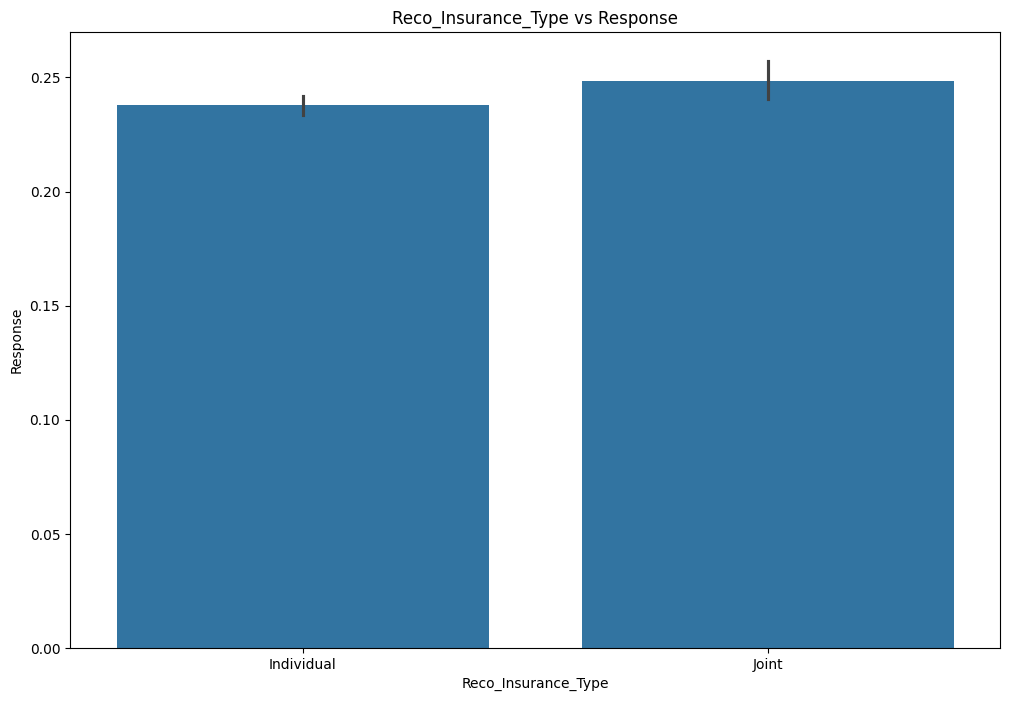

In [76]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Reco_Insurance_Type', y = 'Response', data = dataset)

plt.title("Reco_Insurance_Type vs Response")

Text(0.5, 1.0, 'Upper_Age vs Response')

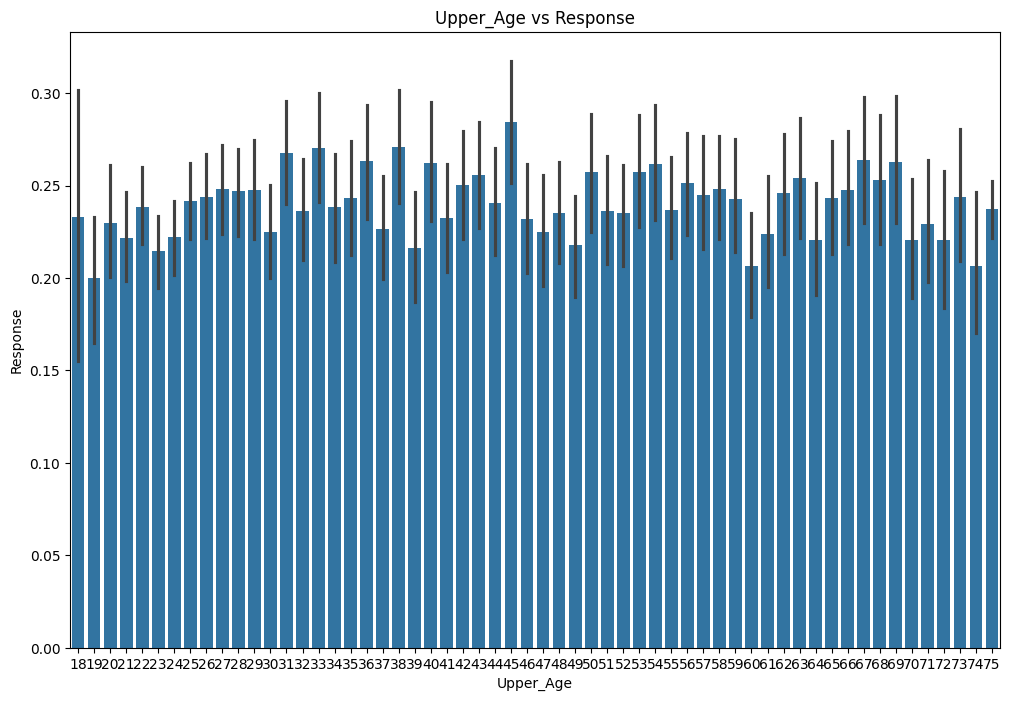

In [77]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Upper_Age', y = 'Response', data = dataset)

plt.title("Upper_Age vs Response")

Text(0.5, 1.0, 'Upper_Age vs Response')

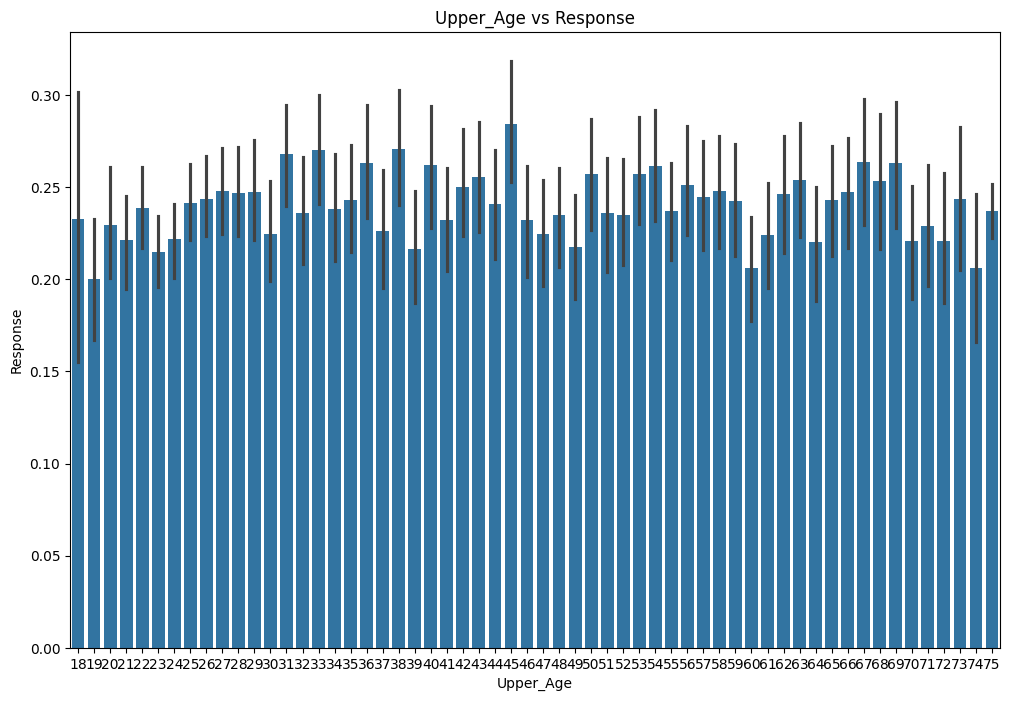

In [78]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Upper_Age', y = 'Response', data = dataset)

plt.title("Upper_Age vs Response")

Text(0.5, 1.0, 'Is_Spouse vs Response')

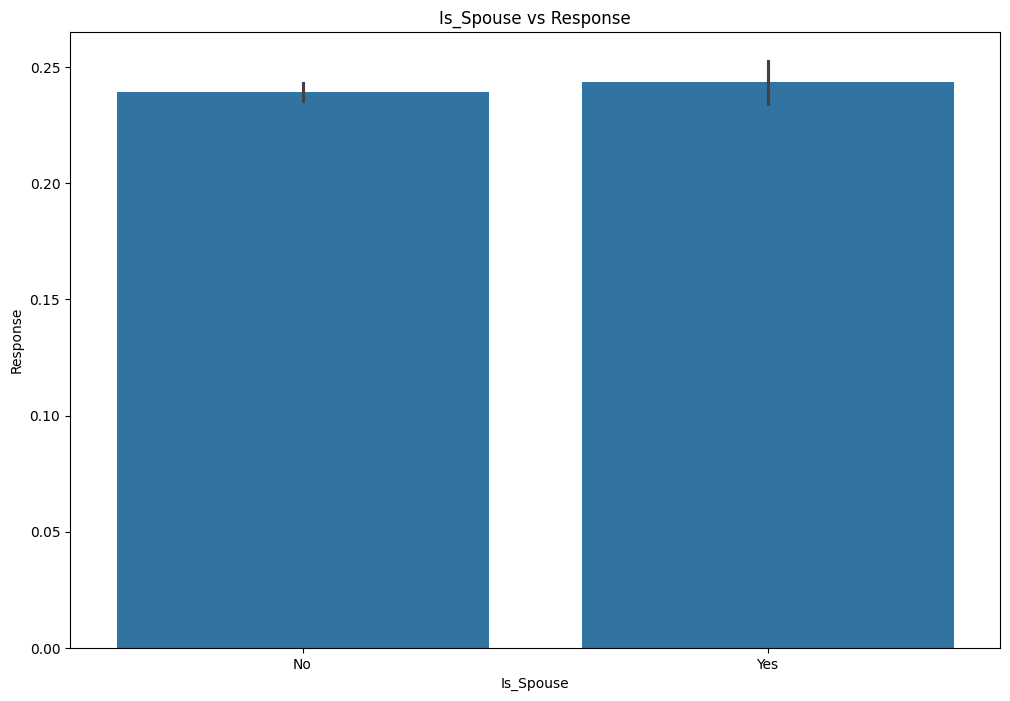

In [79]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Is_Spouse', y = 'Response', data = dataset)

plt.title("Is_Spouse vs Response")

Text(0.5, 1.0, 'Health Indicator vs Response')

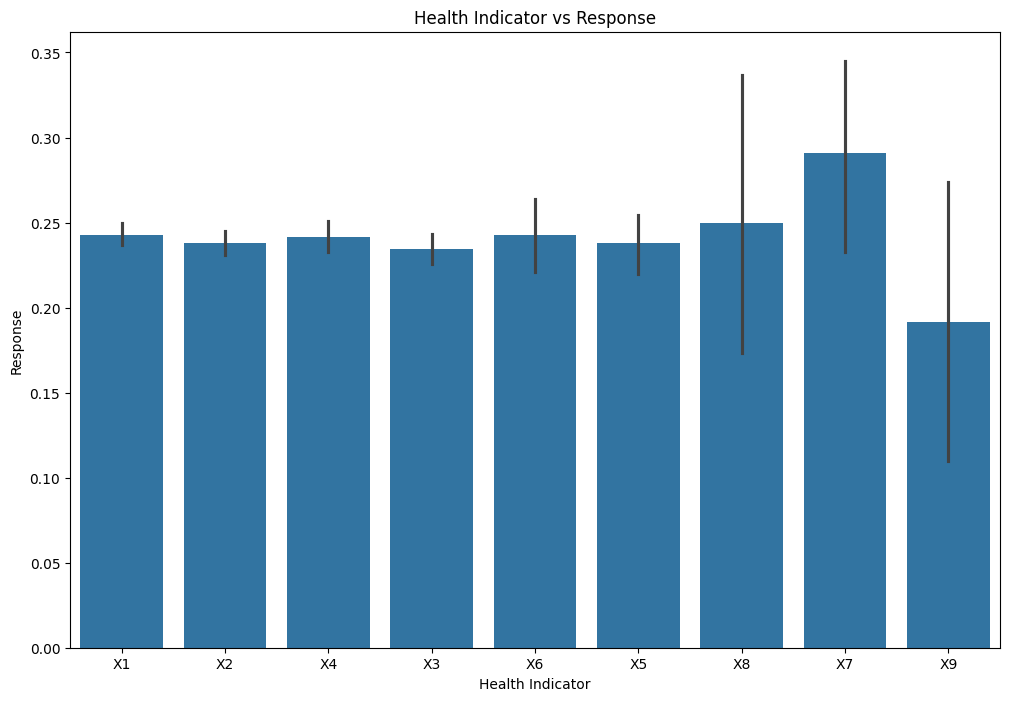

In [80]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Health Indicator', y = 'Response', data = dataset)

plt.title("Health Indicator vs Response")

Text(0.5, 1.0, 'Health Indicator vs Response')

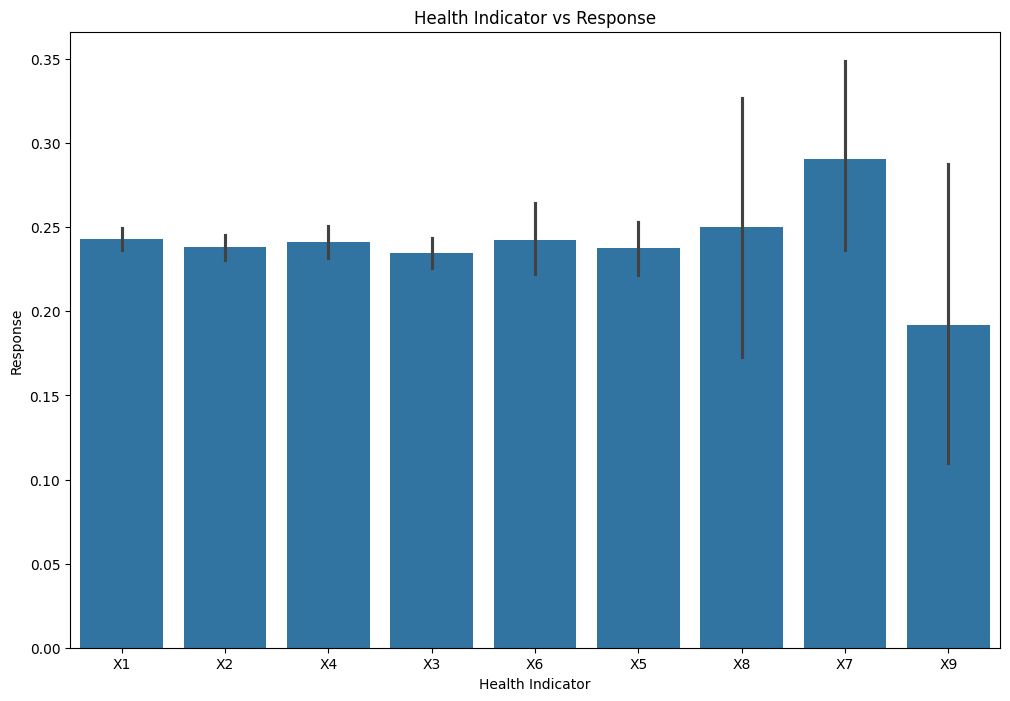

In [81]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Health Indicator', y = 'Response', data = dataset)

plt.title("Health Indicator vs Response")

Text(0.5, 1.0, 'Holding_Policy_Type vs Response')

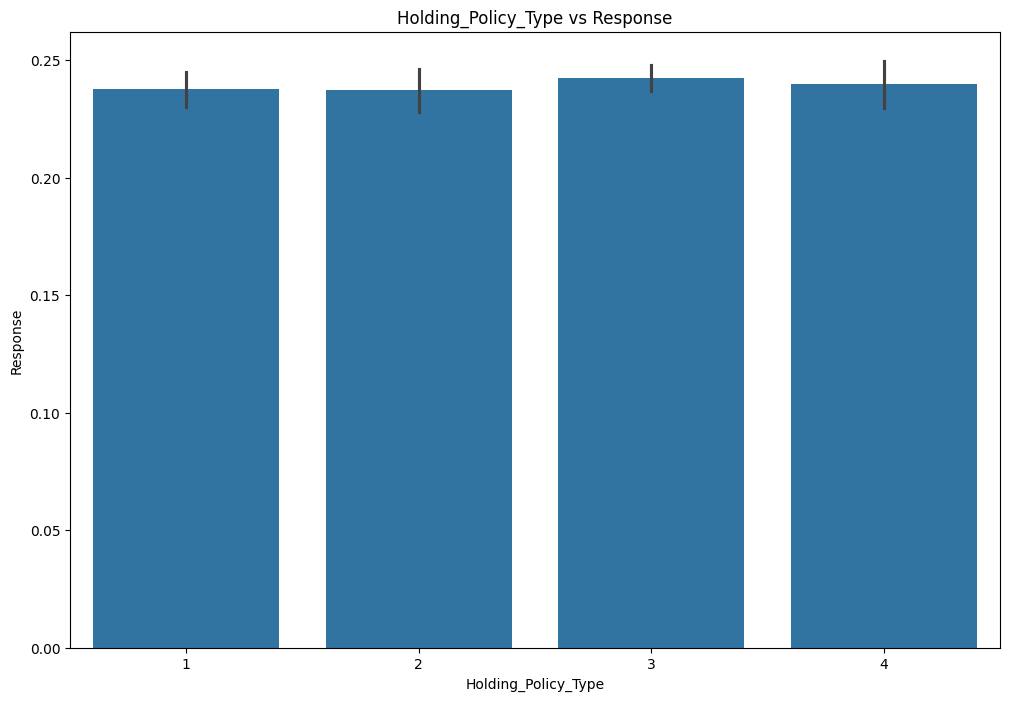

In [82]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Holding_Policy_Type', y = 'Response', data = dataset)

plt.title("Holding_Policy_Type vs Response")

Text(0.5, 1.0, 'Reco_Policy_Cat vs Response')

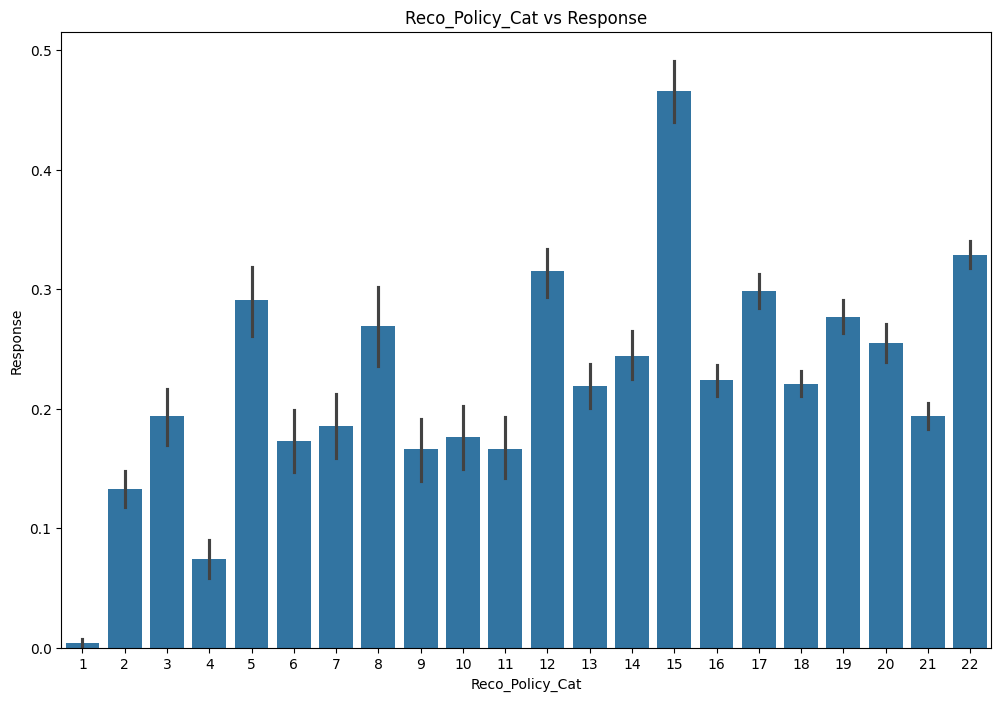

In [83]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Reco_Policy_Cat', y = 'Response', data = dataset)
plt.title("Reco_Policy_Cat vs Response")

In [84]:
# Drop features ie....  because it is not much important for prediction.

In [85]:
dataset = dataset.drop('ID', axis = 1)

dataset = dataset.drop('City_Code', axis = 1)
dataset = dataset.drop('Region_Code', axis = 1)

dataset = dataset.drop('Health Indicator', axis = 1)
dataset = dataset.drop('Holding_Policy_Duration', axis = 1)

#dataset = dataset.drop('Holding_Policy_Type', axis = 1)
#dataset = dataset.drop('Reco_Policy_Premium', axis = 1)

In [86]:
dataset.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Interaction_Text
0,Rented,Individual,36,36,No,3,22,11628.0,0,Interested in a standard health plan. Tell me ...
1,Owned,Joint,75,22,No,3,22,30510.0,0,I need a plan for senior health. We need joint...
2,Owned,Individual,32,32,No,1,19,7450.0,1,Interested in a standard health plan. Tell me ...
3,Owned,Joint,52,48,No,3,19,17780.0,0,Interested in a standard health plan. We need ...
4,Rented,Individual,44,44,No,1,16,10404.0,0,Interested in a standard health plan. Tell me ...


In [87]:
# Label encoding for “Accomodation_Type” and “Reco_Insurance_Type” and "Is_Spouse"

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Accomodation_Type'] = le.fit_transform(dataset['Accomodation_Type'])
dataset['Reco_Insurance_Type'] = le.fit_transform(dataset['Reco_Insurance_Type'])

dataset['Is_Spouse'] = le.fit_transform(dataset['Is_Spouse'])
#dataset['Health Indicator'] = le.fit_transform(dataset['Health Indicator'])


In [88]:
dataset.head(10)

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Interaction_Text
0,1,0,36,36,0,3,22,11628.0,0,Interested in a standard health plan. Tell me ...
1,0,1,75,22,0,3,22,30510.0,0,I need a plan for senior health. We need joint...
2,0,0,32,32,0,1,19,7450.0,1,Interested in a standard health plan. Tell me ...
3,0,1,52,48,0,3,19,17780.0,0,Interested in a standard health plan. We need ...
4,1,0,44,44,0,1,16,10404.0,0,Interested in a standard health plan. Tell me ...
5,1,0,52,52,0,1,22,15264.0,1,Interested in a standard health plan. Tell me ...
6,0,0,28,28,0,1,17,10640.0,0,Looking for affordable insurance for young adu...
7,0,1,75,73,1,4,17,29344.0,1,I need a plan for senior health. I want covera...
8,0,1,52,43,0,3,1,27283.2,0,Interested in a standard health plan. We need ...
9,0,1,59,26,1,4,18,21100.8,1,Interested in a standard health plan. I want c...


In [89]:
filename="traincsvnew.csv"
dataset.to_csv(filename, index=False)

In [90]:
#Working on the text column

In [91]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary resources (only once)
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [92]:
#Cleaning the Interaction text column

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isnull(text):
        return ""

    text = str(text).lower()                        # Lowercase
    text = re.sub(r"http\S+|www\S+", " ", text)     # Remove URLs
    text = re.sub(r"\S+@\S+", " ", text)            # Remove emails
    text = re.sub(r"\d+", " ", text)                # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()        # Remove extra spaces

    # Tokenize, remove stopwords, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]

    return " ".join(tokens)


In [93]:
dataset["interaction_clean"] = dataset["Interaction_Text"].apply(clean_text)

In [94]:
dataset['interaction_clean']

,interaction_clean
0,interested standard health plan tell individua...
1,need plan senior health need joint coverage de...
2,interested standard health plan tell individua...
3,interested standard health plan need joint cov...
4,interested standard health plan tell individua...
...,...
50877,looking affordable insurance young adult tell ...
50878,looking affordable insurance young adult tell ...
50879,need plan senior health tell individual plan p...
50880,need plan senior health need joint coverage de...


In [95]:
dataset

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Interaction_Text,interaction_clean
0,1,0,36,36,0,3,22,11628.0,0,Interested in a standard health plan. Tell me ...,interested standard health plan tell individua...
1,0,1,75,22,0,3,22,30510.0,0,I need a plan for senior health. We need joint...,need plan senior health need joint coverage de...
2,0,0,32,32,0,1,19,7450.0,1,Interested in a standard health plan. Tell me ...,interested standard health plan tell individua...
3,0,1,52,48,0,3,19,17780.0,0,Interested in a standard health plan. We need ...,interested standard health plan need joint cov...
4,1,0,44,44,0,1,16,10404.0,0,Interested in a standard health plan. Tell me ...,interested standard health plan tell individua...
...,...,...,...,...,...,...,...,...,...,...,...
50877,1,0,22,22,0,1,18,7704.0,0,Looking for affordable insurance for young adu...,looking affordable insurance young adult tell ...
50878,1,0,27,27,0,3,4,5408.0,0,Looking for affordable insurance for young adu...,looking affordable insurance young adult tell ...
50879,1,0,63,63,0,1,12,11374.0,0,I need a plan for senior health. Tell me more ...,need plan senior health tell individual plan p...
50880,0,1,71,49,0,2,16,28179.2,1,I need a plan for senior health. We need joint...,need plan senior health need joint coverage de...


In [96]:
#Finding Sentiment Score
from textblob import TextBlob

def get_sentiment(text):
    if not text or text.strip() == "":
        return 0.0
    return TextBlob(text).sentiment.polarity

dataset["sentiment_score"] = dataset["interaction_clean"].apply(get_sentiment)

In [97]:
#Finding word count and char count

dataset["word_count"] = dataset["interaction_clean"].apply(lambda x: len(x.split()))
dataset["char_count"] = dataset["interaction_clean"].apply(lambda x: len(x))

In [98]:
keywords = ["quote", "price", "coverage"]

for kw in keywords:
    dataset[f"kw_{kw}"] = dataset["interaction_clean"].apply(lambda x: 1 if kw in x.split() else 0)

In [99]:
# Show sample of engineered features
print(dataset[["interaction_clean", "sentiment_score", "word_count", "char_count", "kw_quote", "kw_price", "kw_coverage"]].head(10))


                                   interaction_clean  sentiment_score  \
0  interested standard health plan tell individua...         0.187500   
1  need plan senior health need joint coverage de...         0.500000   
2  interested standard health plan tell individua...         0.062500   
3  interested standard health plan need joint cov...         0.250000   
4  interested standard health plan tell individua...         0.187500   
5  interested standard health plan tell individua...         0.062500   
6  looking affordable insurance young adult tell ...         0.175000   
7  need plan senior health want coverage spouse n...         0.000000   
8  interested standard health plan need joint cov...         0.250000   
9  interested standard health plan want coverage ...         0.083333   

   word_count  char_count  kw_quote  kw_price  kw_coverage  
0          14         101         0         0            0  
1          15          98         0         0            1  
2          13

In [100]:
from sentence_transformers import SentenceTransformer

#To generate Embeddings we habe used Bert Sentence Transformer

In [101]:
# Load pretrained model
# all-MiniLM-L6-v2 → 384-dimensional embeddings, lightweight and fast
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Generate embeddings (returns a numpy array)
embeddings = embedder.encode(
    dataset["interaction_clean"].astype(str).tolist(),
    show_progress_bar=True,
    convert_to_numpy=True
)

# Convert embeddings to DataFrame
embeddings_df = pd.DataFrame(
    embeddings,
    columns=[f"emb_{i}" for i in range(embeddings.shape[1])]
)

df_final = pd.concat([dataset.reset_index(drop=True), embeddings_df], axis=1)

print("✅ Embeddings shape:", embeddings.shape)
print("✅ Final dataset shape:", df_final.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1591 [00:00<?, ?it/s]

✅ Embeddings shape: (50882, 384)
✅ Final dataset shape: (50882, 401)


In [102]:
df_final.head(10)

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Interaction_Text,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,1,0,36,36,0,3,22,11628.0,0,Interested in a standard health plan. Tell me ...,...,-0.102482,0.029479,0.033026,-0.060911,0.006383,0.002248,0.046720,-0.064260,0.042922,0.059171
1,0,1,75,22,0,3,22,30510.0,0,I need a plan for senior health. We need joint...,...,-0.099712,0.056311,-0.016835,-0.026349,-0.026403,0.030354,0.080080,-0.059302,-0.015329,0.011427
2,0,0,32,32,0,1,19,7450.0,1,Interested in a standard health plan. Tell me ...,...,-0.081041,0.019660,0.041440,-0.056257,-0.031846,-0.012430,0.030336,-0.075393,0.032869,0.083367
3,0,1,52,48,0,3,19,17780.0,0,Interested in a standard health plan. We need ...,...,-0.093549,0.031523,0.012356,-0.048341,0.012278,0.038009,0.019484,-0.081652,-0.002261,0.045361
4,1,0,44,44,0,1,16,10404.0,0,Interested in a standard health plan. Tell me ...,...,-0.102482,0.029479,0.033026,-0.060911,0.006383,0.002248,0.046720,-0.064260,0.042922,0.059171
5,1,0,52,52,0,1,22,15264.0,1,Interested in a standard health plan. Tell me ...,...,-0.081041,0.019660,0.041440,-0.056257,-0.031846,-0.012430,0.030336,-0.075393,0.032869,0.083367
6,0,0,28,28,0,1,17,10640.0,0,Looking for affordable insurance for young adu...,...,-0.006412,0.015440,-0.000175,-0.034634,0.022088,0.085904,0.061292,-0.076820,0.019518,0.062994
7,0,1,75,73,1,4,17,29344.0,1,I need a plan for senior health. I want covera...,...,-0.101265,0.055841,0.011969,-0.028220,-0.037407,0.015542,0.072095,-0.017348,-0.014677,0.018823
8,0,1,52,43,0,3,1,27283.2,0,Interested in a standard health plan. We need ...,...,-0.062120,0.044229,-0.002531,-0.039418,-0.000641,0.041114,0.004656,-0.085454,-0.019461,0.044518
9,0,1,59,26,1,4,18,21100.8,1,Interested in a standard health plan. I want c...,...,-0.063326,0.040894,0.030363,-0.039974,-0.034522,0.024332,0.001111,-0.041161,-0.013760,0.047583


In [103]:
x=df_final.columns
for i in x:
  print(i)

Accomodation_Type
Reco_Insurance_Type
Upper_Age
Lower_Age
Is_Spouse
Holding_Policy_Type
Reco_Policy_Cat
Reco_Policy_Premium
Response
Interaction_Text
interaction_clean
sentiment_score
word_count
char_count
kw_quote
kw_price
kw_coverage
emb_0
emb_1
emb_2
emb_3
emb_4
emb_5
emb_6
emb_7
emb_8
emb_9
emb_10
emb_11
emb_12
emb_13
emb_14
emb_15
emb_16
emb_17
emb_18
emb_19
emb_20
emb_21
emb_22
emb_23
emb_24
emb_25
emb_26
emb_27
emb_28
emb_29
emb_30
emb_31
emb_32
emb_33
emb_34
emb_35
emb_36
emb_37
emb_38
emb_39
emb_40
emb_41
emb_42
emb_43
emb_44
emb_45
emb_46
emb_47
emb_48
emb_49
emb_50
emb_51
emb_52
emb_53
emb_54
emb_55
emb_56
emb_57
emb_58
emb_59
emb_60
emb_61
emb_62
emb_63
emb_64
emb_65
emb_66
emb_67
emb_68
emb_69
emb_70
emb_71
emb_72
emb_73
emb_74
emb_75
emb_76
emb_77
emb_78
emb_79
emb_80
emb_81
emb_82
emb_83
emb_84
emb_85
emb_86
emb_87
emb_88
emb_89
emb_90
emb_91
emb_92
emb_93
emb_94
emb_95
emb_96
emb_97
emb_98
emb_99
emb_100
emb_101
emb_102
emb_103
emb_104
emb_105
emb_106
emb_107
emb_108
em

In [104]:
#Modelling the data for training and testing

import pandas as pd
from sklearn.model_selection import train_test_split

# Assume your final dataset is df
# Target
y = df_final["Response"]

# Structured features (drop text + embeddings)
structured_cols = [
    col for col in df_final.columns
    if col not in ["Response", "Interaction_Text" ,"interaction_clean"] and not col.startswith("emb_")
]

X_structured = df_final[structured_cols]

# Embeddings
X_embeddings = df_final[[col for col in df_final.columns if col.startswith("emb_")]]

# Concatenate for XGBoost model
import numpy as np
X_all = np.concatenate([X_structured.values, X_embeddings.values], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (40705, 398)
X_test shape: (10177, 398)


In [105]:
#Using XGboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train model
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:42:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0
ROC-AUC  : 1.0


In [106]:
36import tensorflow as tf
from tensorflow.keras import layers, models

# Split separately
X_train_struct, X_test_struct, y_train_struct, y_test_struct = train_test_split(
    X_structured, y, test_size=0.2, random_state=42, stratify=y
)

X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(
    X_embeddings, y, test_size=0.2, random_state=42, stratify=y
)

# Define structured branch
input_struct = layers.Input(shape=(X_structured.shape[1],))
x1 = layers.Dense(64, activation="relu")(input_struct)
x1 = layers.Dropout(0.3)(x1)

# Define embedding branch
input_emb = layers.Input(shape=(X_embeddings.shape[1],))
x2 = layers.Dense(128, activation="relu")(input_emb)
x2 = layers.Dropout(0.3)(x2)

# Concatenate both branches
x = layers.concatenate([x1, x2])
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(1, activation="sigmoid")(x)

# Model
nn_model = models.Model(inputs=[input_struct, input_emb], outputs=output)
nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

# Train
history = nn_model.fit(
    [X_train_struct, X_train_emb], y_train,
    validation_data=([X_test_struct, X_test_emb], y_test),
    epochs=2,
    batch_size=32,
    verbose=1
)

# Evaluate
nn_eval = nn_model.evaluate([X_test_struct, X_test_emb], y_test, verbose=0)
print("Neural Net - Accuracy:", nn_eval[1])
print("Neural Net - AUC     :", nn_eval[2])


Epoch 1/20
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7683 - auc: 0.6916 - loss: 31.9004 - val_accuracy: 0.9997 - val_auc: 1.0000 - val_loss: 5.4338e-04
Epoch 2/20
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9880 - auc: 0.9860 - loss: 0.2913 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 7.9590e-14
Epoch 3/20
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9968 - auc: 0.9966 - loss: 0.0685 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 1.5359e-34
Epoch 4/20
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9993 - auc: 0.9994 - loss: 0.0115 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 2.5828e-30
Epoch 5/20
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 2.0923e-04 - val_accuracy: 0.9824 - val_auc: 0.9685 - val_loss: 0.3961
Epoch 6/20
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9994 - auc: 0.9990 - loss: 0.0179 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 5.3879e-38
E

In [109]:
# ----------------------------
# Imports
# ----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sentence_transformers import SentenceTransformer

# Load Data

# df_final = pd.read_csv("your_file.csv")  # uncomment if needed
# Target
y = df_final["Response"]

# Structured features (drop text + embeddings if present)
structured_cols = [
    col for col in df_final.columns
    if col not in ["Response", "Interaction_Text", "interaction_clean"] and not col.startswith("emb_")
]
X_structured = df_final[structured_cols]

# Text feature
X_text = df_final["interaction_clean"]


# Train-Test Split

X_struct_train, X_struct_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_structured, X_text, y,
    test_size=0.2, random_state=42, stratify=y
)

print("Shapes:")
print("X_struct_train:", X_struct_train.shape)
print("X_struct_test :", X_struct_test.shape)
print("X_text_train  :", X_text_train.shape)
print("X_text_test   :", X_text_test.shape)


# Text Embeddings

model = SentenceTransformer("all-MiniLM-L6-v2")

train_embeddings = model.encode(X_text_train.tolist(), show_progress_bar=True)
test_embeddings  = model.encode(X_text_test.tolist(), show_progress_bar=True)

# Convert to DataFrames and align indices
train_emb_df = pd.DataFrame(
    train_embeddings,
    index=X_text_train.index,
    columns=[f"emb_{i}" for i in range(train_embeddings.shape[1])]
)
test_emb_df = pd.DataFrame(
    test_embeddings,
    index=X_text_test.index,
    columns=[f"emb_{i}" for i in range(test_embeddings.shape[1])]
)


# Merge Structured + Embeddings

X_train_final = pd.concat([X_struct_train.reset_index(drop=True),
                           train_emb_df.reset_index(drop=True)], axis=1)

X_test_final = pd.concat([X_struct_test.reset_index(drop=True),
                          test_emb_df.reset_index(drop=True)], axis=1)

print("Final train shape:", X_train_final.shape)
print("Final test shape :", X_test_final.shape)

# ----------------------------
# Train XGBoost Model
# ----------------------------
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train_final, y_train)

# ----------------------------
# Predictions & Evaluation
# ----------------------------
y_pred = xgb_model.predict(X_test_final)
y_prob = xgb_model.predict_proba(X_test_final)[:, 1]

print("\nModel Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

xgb_model.save_model("xgb_model.json")

Shapes:
X_struct_train: (40705, 14)
X_struct_test : (10177, 14)
X_text_train  : (40705,)
X_text_test   : (10177,)


Batches:   0%|          | 0/1273 [00:00<?, ?it/s]

Batches:   0%|          | 0/319 [00:00<?, ?it/s]

Final train shape: (40705, 398)
Final test shape : (10177, 398)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:52:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0
ROC-AUC  : 1.0


In [110]:
#Verifying the predicted value for the test dataset

X_test_df = pd.DataFrame(X_test_final)

# Pick only the structured columns you care about
structured_cols_to_show = [
    'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age',
    'Is_Spouse', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium'
]

# Build final results DataFrame
results_df = X_test_df[structured_cols_to_show].copy()
results_df["true_response"] = y_test.reset_index(drop=True)
results_df["predicted_response"] = y_pred
results_df["predicted_prob"] = y_prob

# Display
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print(results_df.sample(10))

      Accomodation_Type  Reco_Insurance_Type  Upper_Age  Lower_Age  Is_Spouse  \
1282                  0                    0         75         75          0   
5840                  1                    1         25         24          1   
8751                  0                    0         33         33          0   
8702                  0                    0         44         44          0   
3509                  1                    0         52         52          0   
7977                  0                    0         58         58          0   
3050                  0                    0         73         73          0   
9875                  0                    0         72         72          0   
5106                  1                    0         23         23          0   
6279                  0                    0         69         69          0   

      Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  \
1282                    1               1

In [111]:
# Columns actually used in training
trained_columns = df_final.drop(columns=["Response", "Interaction_Text", "interaction_clean"]).columns.tolist()

def predict_manual_input(structured_input, raw_text, model, embedding_model, trained_columns):
    """
    structured_input : dict of structured features
    raw_text         : string (customer interaction)
    model            : trained XGBoost model
    embedding_model  : SentenceTransformer used for embeddings
    trained_columns  : list of feature names the model was trained on
    """

    # 1. Structured features → DataFrame
    struct_df = pd.DataFrame([structured_input])

    # 2. Generate embedding for the raw text
    embedding = embedding_model.encode([raw_text])[0]  # shape (384,)
    emb_df = pd.DataFrame([embedding], columns=[f"emb_{i}" for i in range(len(embedding))])

    # 3. Merge structured + embeddings
    new_input = pd.concat([struct_df, emb_df], axis=1)

    # 4. Align with training columns (drop missing, fill missing)
    new_input = new_input.reindex(columns=trained_columns, fill_value=0)

    # 5. Predict
    prob = model.predict_proba(new_input.values)[0, 1]
    label = int(model.predict(new_input.values)[0])

    return label, prob, new_input


Checking model prediction for some random value

In [112]:
# Example structured input (fill with real values)
structured_input = {
    "Accomodation_Type": 0,
    "Reco_Insurance_Type": 1,
    "Upper_Age": 52,
    "Lower_Age": 43,
    "Is_Spouse": 0,
    "Holding_Policy_Type": 3,
    "Reco_Policy_Cat": 1,
    "Reco_Policy_Premium": 27283,
    "sentiment_score": 0.25,
    "word_count": 15,
    "kw_quote": 0,
    "kw_price": 0,
    "kw_coverage": 0
}

# Example raw interaction text
raw_text = "I am looking for an affordable insurance plan with good coverage for my spouse."

# Run prediction
label, prob, final_input = predict_manual_input(
    structured_input, raw_text, xgb_model, embedder, trained_columns
)

print("Predicted Label:", label)
print("Predicted Probability:", prob)


Predicted Label: 0
Predicted Probability: 0.0044556474
